# Image Classification with HOG Feature and Neural Networks

In [140]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn import datasets
from mlxtend.data import loadlocal_mnist
from sklearn.neural_network import MLPClassifier

In [142]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


## 1. Dataset Preparation

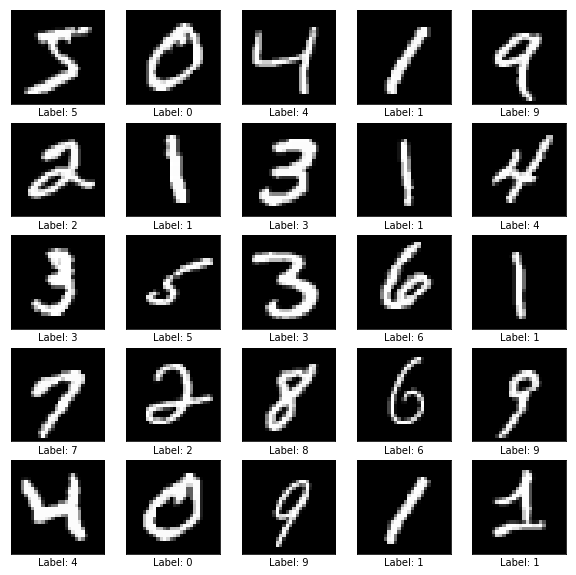

**Download MNIST dataset**

**Load image dataset**

In [147]:
train_images, train_labels = loadlocal_mnist(
    images_path='D:\\FILE UTS MACHINE VISION\\emnist_source_files\\emnist-mnist-train-images-idx3-ubyte',
    labels_path='D:\\FILE UTS MACHINE VISION\\emnist_source_files\\emnist-mnist-train-labels-idx1-ubyte'
)

In [148]:
test_images, test_labels = loadlocal_mnist(
    images_path='D:\\FILE UTS MACHINE VISION\\emnist_source_files\\emnist-mnist-test-images-idx3-ubyte',
    labels_path='D:\\FILE UTS MACHINE VISION\\emnist_source_files\\emnist-mnist-test-labels-idx1-ubyte'
)

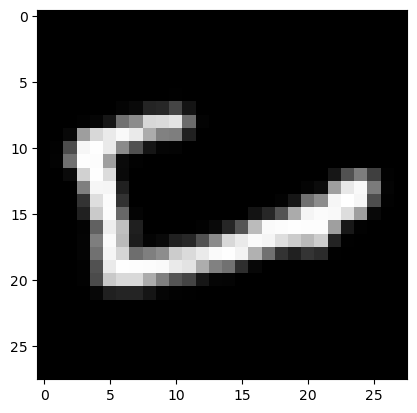

In [149]:
plt.imshow(train_images[5].reshape(28,28), cmap='gray')

In [150]:
train_labels[5]

7

**Test extract HOG feature from image**

In [152]:
feature, hog_img = hog(train_images[7].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')

In [153]:
feature.shape

(144,)

<BarContainer object of 144 artists>

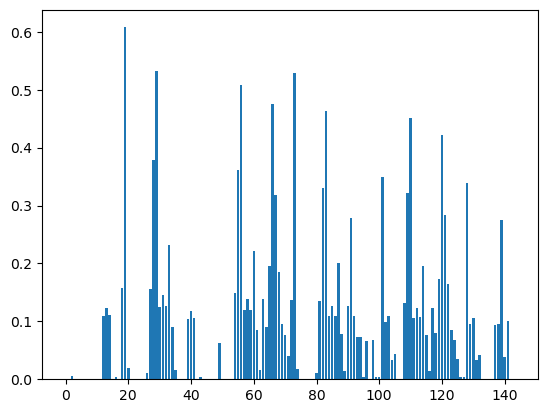

In [154]:
plt.bar(list(range(feature.shape[0])), feature)

In [155]:
feature, hog_img = hog(train_images[2].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')

<BarContainer object of 144 artists>

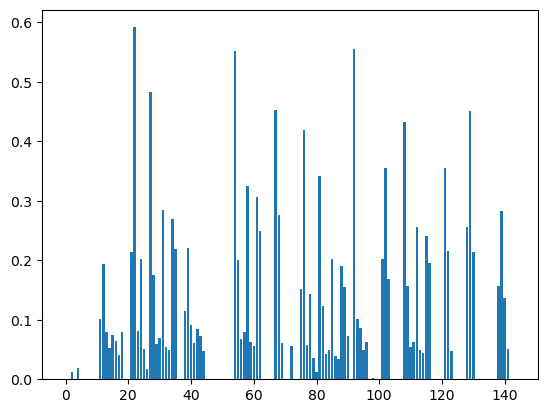

In [156]:
plt.bar(list(range(feature.shape[0])), feature)

## 2. Preprocessing using HOG Feature Extraction

In [158]:
n_dims = feature.shape[0]

In [159]:
n_dims

144

In [160]:
n_samples = train_images.shape[0]

In [161]:
n_samples

60000

**Create variable for dataset**

In [163]:
X_train, y_train = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

In [164]:
X_train.shape

(60000, 144)

**Get HOG feature from each image & put into dataset variable**

In [166]:
for i in range(n_samples):
    X_train[i], _ = hog(train_images[i].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')
    y_train[i] = train_labels[i]

**Convert categorical label to one hot label**

In [168]:
from sklearn.preprocessing import LabelBinarizer

In [169]:
lb = LabelBinarizer()

In [170]:
lb.fit(y_train)

LabelBinarizer()

In [171]:
y_train_one_hot  = lb.transform(y_train)

In [172]:
y_train_one_hot[5]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [173]:
y_train[5]

7

In [174]:
import numpy as np

In [175]:
label = lb.inverse_transform(np.array([y_train_one_hot[0]]))

In [176]:
label[0]

4

## 3. Classification with Neural Networks

In [179]:
clf = MLPClassifier(hidden_layer_sizes=(256, 64, 10), solver='sgd', learning_rate_init=0.001, max_iter=100)

In [180]:
clf.fit(X_train, y_train_one_hot)

C:\Users\Salsa\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(256, 64, 10), max_iter=100, solver='sgd')

## 4. Predict Test Dataset 

In [182]:
n_samples = test_images.shape[0]

In [183]:
X_test, y_test = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

In [184]:
for i in range(n_samples):
    X_test[i], _ = hog(test_images[i].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')
    y_test[i] = test_labels[i]

In [185]:
y_test_one_hot = lb.transform(y_test)

In [186]:
y_pred_one_hot = clf.predict(X_test)

In [187]:
y_pred = lb.inverse_transform(y_pred_one_hot)

In [188]:
y_pred

array([1, 8, 6, ..., 8, 9, 6])

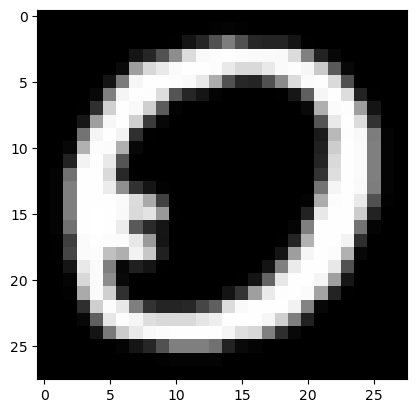

In [189]:
plt.imshow(test_images[20].reshape(28,28), cmap='gray')

In [190]:
out_one_hot = clf.predict(X_test[20].reshape(1, n_dims))

In [191]:
out_one_hot

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [192]:
out = lb.inverse_transform(out_one_hot.reshape(1,10))

In [193]:
out[0]

0

## 5. Evaluation Metrics

### 5. 1 Confussion Matrix

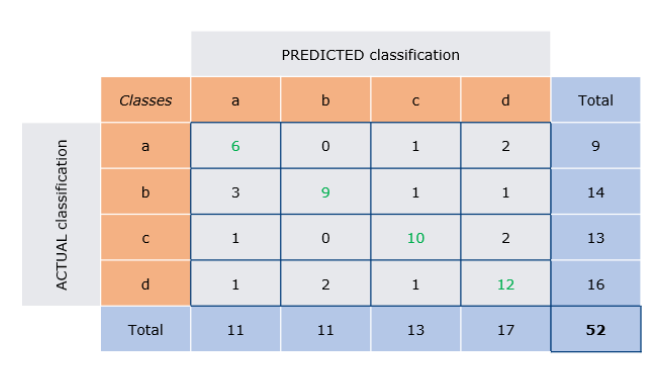

In [196]:
from sklearn.metrics import confusion_matrix

In [197]:
conf_mat = confusion_matrix(y_test, y_pred)

In [198]:
conf_mat

array([[995,   2,   0,   0,   2,   0,   0,   0,   1,   0],
       [ 12, 979,   2,   0,   3,   0,   0,   1,   3,   0],
       [ 30,   2, 952,   9,   1,   1,   1,   1,   3,   0],
       [ 20,   0,  11, 955,   0,   5,   0,   1,   5,   3],
       [ 16,   3,   1,   0, 969,   0,   3,   0,   0,   8],
       [ 14,   0,   1,   7,   1, 975,   1,   0,   0,   1],
       [ 12,   1,   1,   0,   2,   2, 982,   0,   0,   0],
       [ 23,   0,   5,   2,   2,   0,   0, 961,   2,   5],
       [ 23,   5,   4,  11,   2,   4,   2,   2, 943,   4],
       [ 27,   0,   0,   6,   5,   6,   0,   9,   1, 946]], dtype=int64)

In [199]:
from mlxtend.plotting import plot_confusion_matrix

In [200]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

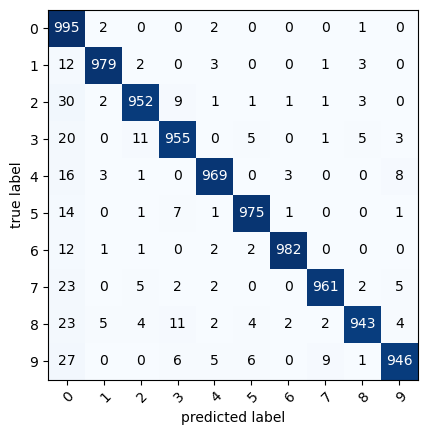

In [201]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat, class_names=class_names)

### 5.2 Precission

$$\text { Precision }=\frac{T P}{T P+F P}$$

In [204]:
from sklearn.metrics import precision_score

In [205]:
precision = precision_score(y_test, y_pred, average=None)

In [206]:
precision

array([0.84897611, 0.98689516, 0.97441146, 0.96464646, 0.98176292,
       0.98187311, 0.99292214, 0.98564103, 0.98434238, 0.97828335])

### 5.3 Recall

$$\text { Recall }=\frac{T P}{T P+F N}$$

In [209]:
from sklearn.metrics import recall_score

In [210]:
recall = recall_score(y_test, y_pred, average=None)

In [211]:
recall

array([0.995, 0.979, 0.952, 0.955, 0.969, 0.975, 0.982, 0.961, 0.943,
       0.946])

### 5.4 Accuracy

$$\text { Accuracy }=\frac{T P+T N}{T P+T N+F P+F N}$$

In [214]:
from sklearn.metrics import accuracy_score

In [215]:
accuracy = accuracy_score(y_test, y_pred)

In [216]:
accuracy

0.9657

### 5.5 F1-Score

$$\text { F1-Score }=\left(\frac{2}{\text { precision }^{-1}+\text { recall }^{-1}}\right)=2 \cdot\left(\frac{\text { precision } \cdot \text { recall }}{\text { precision }+\text { recall }}\right)$$

In [219]:
from sklearn.metrics import f1_score

In [220]:
f1 = f1_score(y_test, y_pred, average='macro')

In [222]:
f1

0.9661470623455017